### 求前 n 个主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X.shape

(100, 2)

In [3]:
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0.,10.,size=100)

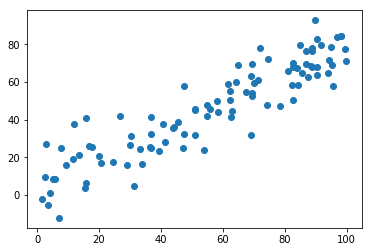

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### demean

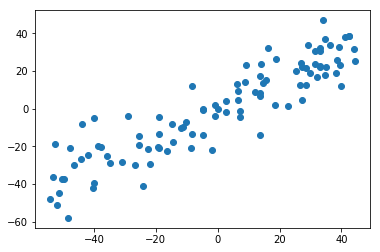

In [5]:
def demean(X):
    return X - np.mean(X,axis=0)

X_demean = demean(X)

plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [6]:
np.mean(X_demean[:,0])

6.608047442568932e-15

In [7]:
np.mean(X_demean[:,1])

1.4210854715202004e-14

### 梯度上升法

In [8]:
def f(w,X):
    return np.sum((X.dot(w)** 2)) / len(X)

In [9]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2. / len(X)

In [10]:
def df_debug(w,X,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w_2,X)) / (2 * epsilon)
    return res

In [11]:
# 将w转化成单位向量
def direction(w):
    return w / np.linalg.norm(w)

def first_component(X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df_math(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)# 每次求一次单位向量
        if abs(f(w,X) - f(last_w,X)) < epsilon:
            break
        
        cur_iter += 1
        
    return w

In [12]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.92917603, 0.82747943])

In [13]:
eta = 0.01

In [14]:
first_component(X_demean,initial_w,eta)

array([0.78298259, 0.62204361])

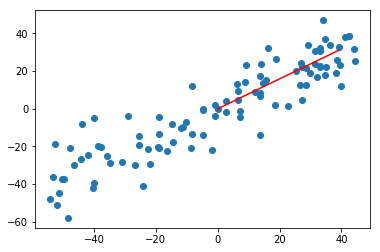

In [15]:
w = first_component(X_demean,initial_w,eta)

plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*50],[0,w[1]*50],color='r')
plt.show()

In [16]:
X2 = X - X.dot(w).reshape(-1,1)*w

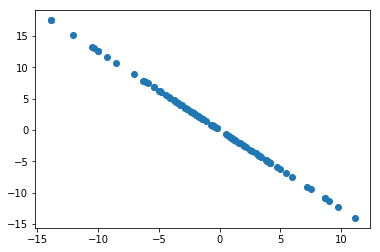

In [17]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [18]:
w2 = first_component(X2,initial_w,eta)
w2

array([-0.62204021,  0.7829853 ])

In [19]:
w.dot(w2)

4.345332316857409e-06

In [20]:
def first_n_component(n,X,eta=0.01,n_iters=1e4,epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca,initial_w,eta)
        res.append(w)
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1)*w
    return res

In [21]:
first_n_component(2,X)

[array([0.78298263, 0.62204357]), array([-0.62204128,  0.78298445])]